In [1]:
import pandas as pd
import numpy as np

In [2]:
train_data = pd.read_csv('./digit-recognizer/train.csv')
train_data_numpy = np.array(train_data)

In [3]:
#1(b)#this function is to draw digit
import matplotlib.pyplot as pyplot
def draw_digit(instance_numpy,title='digit'):
    label_part = instance_numpy[0]
    data_part = instance_numpy[1:].reshape(28,28)
    pyplot.title('value:{}'.format(str(label_part)))
    pyplot.imshow(data_part)
    pyplot.title(title)
    pyplot.show()

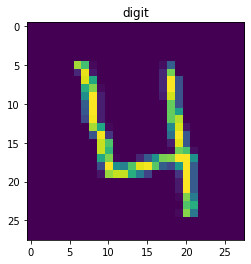

In [4]:
draw_digit(train_data_numpy[3])

[0 1 2 3 4 5 6 7 8 9]
[4132, 4684, 4177, 4351, 4072, 3795, 4137, 4401, 4063, 4188]


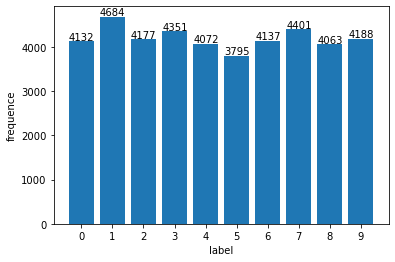

In [5]:
#(c) Examine the prior probability of the classes
labels = train_data_numpy[:,0]
label_unique = np.unique(labels)
label_number = []
for label_item in label_unique:
    label_number.append(np.sum(labels == label_item))#count the number of every digit
print(label_unique)
print(label_number)
pyplot.bar([str(item) for item in label_unique],label_number) 
pyplot.xlabel('label')
pyplot.ylabel('frequence')
for x, y in enumerate(label_number):
    pyplot.text(x-0.4, y+32, "%s" %y)

start matching 0:   4%|▎         | 1513/42000 [00:00<00:02, 15122.05it/s]

match:0
4132



start matching 0: 100%|██████████| 42000/42000 [00:03<00:00, 13434.57it/s]


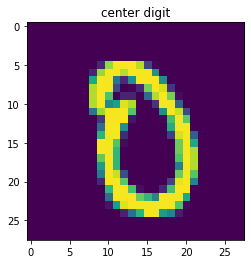

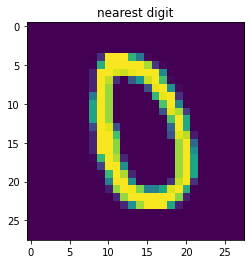

start matching 1:   3%|▎         | 1289/42000 [00:00<00:03, 12881.54it/s]

match:1
4684



start matching 1: 100%|██████████| 42000/42000 [00:02<00:00, 14105.74it/s]


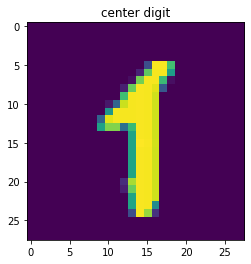

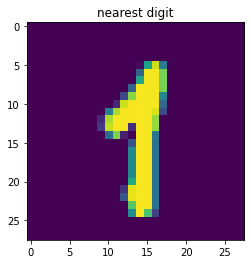

start matching 2:   3%|▎         | 1465/42000 [00:00<00:02, 14643.00it/s]

match:2
4177



start matching 2: 100%|██████████| 42000/42000 [00:03<00:00, 13380.50it/s]


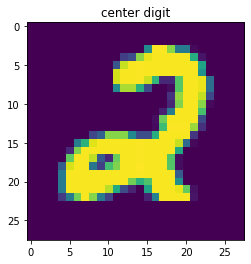

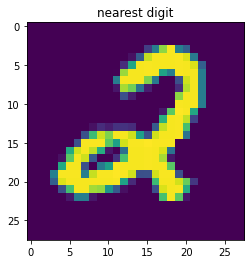

start matching 3:   3%|▎         | 1361/42000 [00:00<00:02, 13609.53it/s]

match:3
4351



start matching 3: 100%|██████████| 42000/42000 [00:03<00:00, 12868.75it/s]


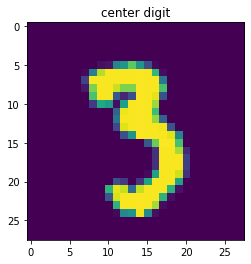

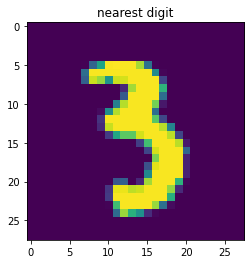

start matching 4:   3%|▎         | 1254/42000 [00:00<00:03, 12538.01it/s]

match:4
4072



start matching 4: 100%|██████████| 42000/42000 [00:03<00:00, 12430.20it/s]


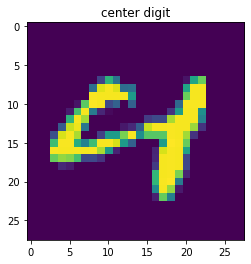

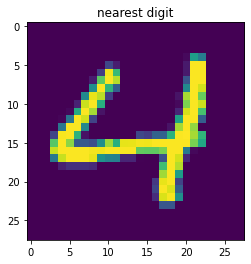

start matching 5:   3%|▎         | 1270/42000 [00:00<00:03, 12699.04it/s]

match:5
3795



start matching 5: 100%|██████████| 42000/42000 [00:03<00:00, 12584.58it/s]


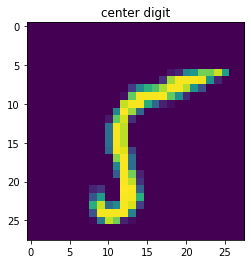

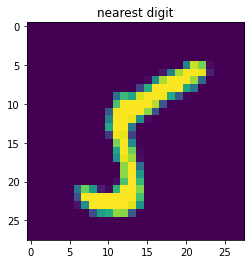

start matching 6:   4%|▎         | 1515/42000 [00:00<00:02, 15147.23it/s]

match:6
4137



start matching 6: 100%|██████████| 42000/42000 [00:03<00:00, 13307.22it/s]


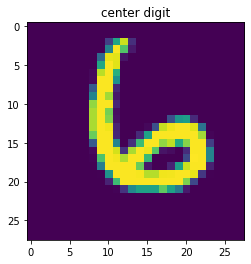

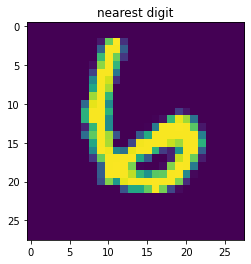

start matching 7:   3%|▎         | 1196/42000 [00:00<00:03, 11956.45it/s]

match:7
4401



start matching 7: 100%|██████████| 42000/42000 [00:03<00:00, 13390.47it/s]


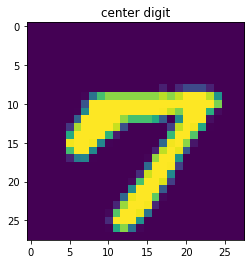

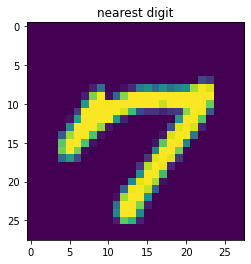

start matching 8:   3%|▎         | 1465/42000 [00:00<00:02, 14641.46it/s]

match:8
4063



start matching 8: 100%|██████████| 42000/42000 [00:03<00:00, 13649.54it/s]


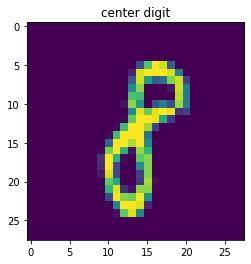

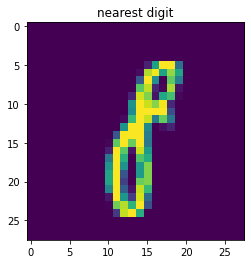

start matching 9:   4%|▍         | 1792/42000 [00:00<00:02, 17912.29it/s]

match:9
4188



start matching 9: 100%|██████████| 42000/42000 [00:03<00:00, 13228.01it/s]


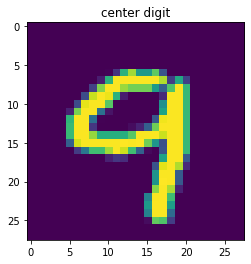

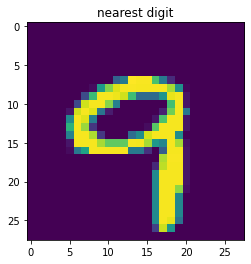

100%|██████████| 10/10 [00:35<00:00,  3.56s/it]


In [6]:
#(d) Pick one example of each digit from your training data. Then, for each sample digit, compute and show the best match (nearest neighbor)
from tqdm import tqdm
index_np = np.array(list(range(train_data_numpy.shape[0])))
for source_number in tqdm(label_unique):
    nearest_index,nearest_distance = -1,255*255*28*28
    print('match:{}'.format(str(source_number)))
    this_label_index = index_np[labels==source_number]
    print(len(this_label_index))
    assert len(this_label_index) >= 10
    random_index = np.random.choice(this_label_index,size=1,replace=False)[0] # random select a digit to predict
#     print(train_data_numpy[random_index])
    # start match in the all dataset:
    for target_index in tqdm(index_np,desc='start matching {}'.format(str(source_number))):
        if not random_index == target_index:
            this_distance = np.linalg.norm(train_data_numpy[random_index][1:]-train_data_numpy[target_index][1:])
            if this_distance < nearest_distance:
                nearest_distance = this_distance
                nearest_index = target_index
    
    draw_digit(train_data_numpy[random_index],title='center digit')
    draw_digit(train_data_numpy[nearest_index],title='nearest digit')
    

[37683  6745  5676 32713 38943 31097 37638 11253 28981 37340 31193 26033
 40739 18419 19826 31899 41569 38278 41479 32866  4873 22688 11523  5295
 30972 27897  4435 26331  1464  3849 18099  2663  2283 33679 30434 12271
 22759 18575  9280 11167 19080 25665 12913 30054 41655 18405  6097 34514
 14441 38172 35442 15367 30998 21007 26196 37641    59 25168  7161  1027
 19288  6363 22486 24742  6088  7831 20581 16796  8246  3118 25744  5373
  8596 18993 39455 23800 28143 34949 39237 26221  3200 23713 12692  7376
  9994 34254  2651 29197 39629 33044 41926 20142  2338 10660 24091 13793
 30371 37868    79 33081]
[24763  9097 36527 37987  3607  7551  5703 17806 14370 37988  6919 12080
 35762  7022 30696 17577 40556 39987 23476 15748 19358 23896 27577 23687
 16817 20535 30767  7911 36494 18757  7796  2937 17182 40431 29714 26639
 29868  2823 18830 34076 32893 21284 18189  5208 15230 10486 29437 29882
 34292 36369  9102  5262  8504 13652 37322  7162  1989 34246 10747 12753
 39013  5712 38245 37474 

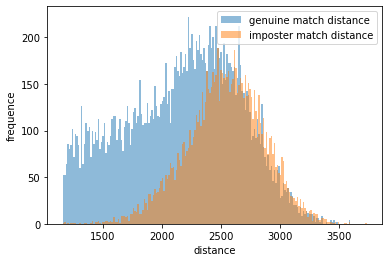

In [7]:
# (e)Consider the case of binary comparison between the digits 0 and 1
#distance of genuine matches and imposter matches
genuine_distance = []
imposter_distence = []
select_numbers = [1,2]
# compuer genuime matches

def compare_one_list_inner_distance(this_num_index,distance_list):
    for source_index in this_num_index:
        for target_index in this_num_index:
            if not source_index == target_index:
                distance_list.append(np.linalg.norm(train_data_numpy[source_index][1:] 
                                                    - train_data_numpy[target_index][1:]))
    return distance_list

def compare_two_list_distance(source_num_index,target_num_index,distance_list):
    for source_index in this_num_index:
        for target_index in target_num_index:
            if not source_index == target_index:
                distance_list.append(np.linalg.norm(train_data_numpy[source_index][1:] 
                                                    - train_data_numpy[target_index][1:]))
    return distance_list
sample_num = 100
for genuine_number in select_numbers:
    this_num_index = index_np[labels==genuine_number]
    this_num_index = np.random.choice(this_num_index,size=sample_num,replace=False)
    print(this_num_index)
    genuine_distance.extend(compare_one_list_inner_distance(this_num_index,[]))
index_1 = index_np[labels==1]
index_1 = np.random.choice(index_1,size=sample_num,replace=False)
index_2 = index_np[labels==2]
index_2 = np.random.choice(index_2,size=sample_num,replace=False)
imposter_distence.extend(compare_two_list_distance(index_1,index_2,[]))
print(len(genuine_distance))
print(len(imposter_distence))
bins = np.linspace(min(imposter_distence) , max(imposter_distence),200)
pyplot.hist(genuine_distance,bins,alpha=0.5,label='genuine match distance')
pyplot.hist(imposter_distence,bins,alpha=0.5,label='imposter match distance')
pyplot.legend(loc='upper right')
pyplot.xlabel('distance')
pyplot.ylabel('frequence')
pyplot.show()

In [8]:
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score as AUC

EER: 0.3281640820410205


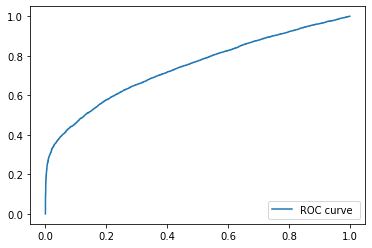

In [9]:
# (f) Generate an ROC curve from the above sets of distances. 
#print(genuine_distance)
FPR, recall, thresholds = roc_curve([1]*len(genuine_distance) + [0]*len(imposter_distence),
                                    [-item for item in genuine_distance]+[-item for item in imposter_distence]
                                   )
fnr = 1 - recall
EER = FPR[np.nanargmin(np.absolute((fnr - FPR)))]
print('EER: {}'.format(str(EER)))
pyplot.figure()
pyplot.plot(FPR,recall,label='ROC curve ')
pyplot.legend(loc="lower right")
pyplot.show()

In [10]:
#(g) Implement a K-NN classifier. User pytorch and GPU to accelerate
import os
import torch
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
class KNN_model(torch.nn.Module):
    def __init__(self):
        super(KNN_model,self).__init__()
    def forward(self,predict_instance,train_models):
        predict_instance = torch.unsqueeze(predict_instance,dim = 1)  # batch_size * 784 - > batch_size * 1 * 784
        predict_instance  = predict_instance.repeat(1,train_models.size(0),1)
        diff = predict_instance - train_models  # batch_size * trian_size * 784
        distance = torch.norm(diff.float(),dim =-1) # batch_size * trian_size
        return distance.cpu().numpy()


In [11]:
print(list(range(0,102,4)))

[0, 4, 8, 12, 16, 20, 24, 28, 32, 36, 40, 44, 48, 52, 56, 60, 64, 68, 72, 76, 80, 84, 88, 92, 96, 100]


In [ ]:
#(j)Train your classifier with all of the training data, and test your classifier with the test data.
from sklearn.metrics import accuracy_score
test_file = pd.read_csv('./digit-recognizer/test.csv')
test_numpy = np.array(test_file)
test_index = np.expand_dims(np.array(list(range(test_numpy.shape[0]
                                               ))),-1)
print(test_index.shape)
print(test_numpy.shape)
test_numpy = np.concatenate((test_index,test_numpy),axis=1)
print(test_numpy.shape)
test_index = list(range(1,test_numpy.shape[0] + 1))
model = KNN_model()
model = model.cuda()
batch_size = 8
hould_out_set = test_numpy
sub_train_set = train_data_numpy
K = 1
y_predict = [] 
hould_out_set = test_numpy
point = list(range(0,hould_out_set.shape[0],batch_size))
point.append(hould_out_set.shape[0])
batches = []
for i in range(len(point) - 1):
    batches.append((point[i],point[i+1]))
train_models = torch.from_numpy(train_data_numpy[:,1:]).cuda()
train_labels = train_data_numpy[:,0]
print(batches)
for batch in tqdm(batches):
    predict_instrance = torch.from_numpy(hould_out_set[batch[0]:batch[1],1:]).cuda()
    batch_l2_distance = model(predict_instrance,train_models) # batch_size * trian_size
    for instance_dis_list_index in range(batch_l2_distance.shape[0]):
        distance_list = batch_l2_distance[instance_dis_list_index]
        label_distance_pair = zip(train_labels,distance_list)
        label_distance_pair_sorted = list(sorted(label_distance_pair,key= lambda x:x[1]))
        corresponding_label = []
        for i in range(K):
            corresponding_label.append(label_distance_pair_sorted[i][0])
        label = -1
        nearest_number = -1
        for i in range(10):
            this_frequen = np.sum(np.array(corresponding_label) == i)
    #         print(corresponding_label[0:K])
    #         print(top_K_distance)
            if this_frequen > nearest_number:
                nearest_number = this_frequen
                label = i
        y_predict.append(label)

#     print(y_predict)
submition_file = pd.DataFrame()
submition_file['ImageId'] = test_index
submition_file['Label'] = y_predict
submition_file.to_csv('./digit-recognizer/submission.csv',sep=',',index=False,header=True)

(28000, 1)
(28000, 784)
(28000, 785)


  0%|          | 0/3500 [00:00<?, ?it/s]

[(0, 8), (8, 16), (16, 24), (24, 32), (32, 40), (40, 48), (48, 56), (56, 64), (64, 72), (72, 80), (80, 88), (88, 96), (96, 104), (104, 112), (112, 120), (120, 128), (128, 136), (136, 144), (144, 152), (152, 160), (160, 168), (168, 176), (176, 184), (184, 192), (192, 200), (200, 208), (208, 216), (216, 224), (224, 232), (232, 240), (240, 248), (248, 256), (256, 264), (264, 272), (272, 280), (280, 288), (288, 296), (296, 304), (304, 312), (312, 320), (320, 328), (328, 336), (336, 344), (344, 352), (352, 360), (360, 368), (368, 376), (376, 384), (384, 392), (392, 400), (400, 408), (408, 416), (416, 424), (424, 432), (432, 440), (440, 448), (448, 456), (456, 464), (464, 472), (472, 480), (480, 488), (488, 496), (496, 504), (504, 512), (512, 520), (520, 528), (528, 536), (536, 544), (544, 552), (552, 560), (560, 568), (568, 576), (576, 584), (584, 592), (592, 600), (600, 608), (608, 616), (616, 624), (624, 632), (632, 640), (640, 648), (648, 656), (656, 664), (664, 672), (672, 680), (680, 6

 84%|████████▍ | 2954/3500 [21:50<03:42,  2.45it/s]

In [ ]:
#GPU (h)Take 15% of your dataset and make it your holdout set.
from sklearn.metrics import accuracy_score
train_index = list(range(train_data_numpy.shape[0]))
hould_out_index = list(np.random.choice(train_index,size=int(0.15*len(train_index)),replace=False))
sub_train_index = list(set(train_index) - set(hould_out_index))
hould_out_set = train_data_numpy[hould_out_index]
sub_train_set = train_data_numpy[sub_train_index]
y_true = hould_out_set[:,0]
model = KNN_model()
model = model.cuda()
batch_size = 16
train_labels = sub_train_set[:,0]
for K in tqdm(range(1,2)):
    y_predict = [] 
    point = list(range(0,hould_out_set.shape[0],batch_size))
    point.append(hould_out_set.shape[0])
    batches = []
    for i in range(len(point) - 1):
        batches.append((point[i],point[i+1]))
    train_models = torch.from_numpy(sub_train_set[:,1:]).cuda()
    for batch in batches:
        predict_instrance = torch.from_numpy(hould_out_set[batch[0]:batch[1],1:]).cuda()
        batch_l2_distance = model(predict_instrance,train_models) # batch_size * trian_size
        for instance_dis_list_index in range(batch_l2_distance.shape[0]):
            distance_list = batch_l2_distance[instance_dis_list_index]
            label_distance_pair = zip(train_labels,distance_list)
            label_distance_pair_sorted = list(sorted(label_distance_pair,key= lambda x:x[1]))
            corresponding_label = []
            for i in range(K):
                corresponding_label.append(label_distance_pair_sorted[i][0])
            label = -1
            nearest_number = -1
            for i in range(10):
                this_frequen = np.sum(np.array(corresponding_label) == i)
        #         print(corresponding_label[0:K])
        #         print(top_K_distance)
                if this_frequen > nearest_number:
                    nearest_number = this_frequen
                    label = i
            y_predict.append(label)
        
#     print(y_predict)
    accuracy = accuracy_score(y_true,y_predict)
    print('K:{} \t accuracy:{}'.format(str(K),str(accuracy)))

In [ ]:
# (i) Generate a confusion matrix (of size 10 × 10) from your results
import seaborn as sns
a,(ax1) = pyplot.subplots(figsize=(12, 10),nrows=1)
# pyplot.ylabel('')
# pyplot.xlabel('')
# pyplot.show()
# sns.xlabel('true label')
h = sns.heatmap(fussion_matrix,ax=ax1,annot=True,annot_kws={'size':14})
ax1.set_xlabel('probability of different label it will be classified into',size = 14)
ax1.set_ylabel('true label',size = 18)